# Premissas do Algoritmo KNN (K-Nearest Neighbors)

O KNN é um algoritmo de aprendizado supervisionado baseado em instâncias. Ele classifica ou faz previsões com base nos K vizinhos mais próximos.

## Sobre o Algoritmo KNN

### Motivação e Conceito

O KNN (K-Nearest Neighbors) é baseado na intuição de que **"coisas similares tendem a estar próximas"**. Se você quer saber a classe de um novo ponto, basta perguntar aos vizinhos mais próximos dele.

**Analogia do mundo real:**
- Você se muda para um bairro novo e quer saber se é seguro
- Você pergunta aos 5 vizinhos mais próximos (K=5)
- 4 dizem "sim, é seguro" e 1 diz "não"
- Por votação majoritária: o bairro é seguro!

**Conceito:** KNN é um algoritmo **não-paramétrico**, **lazy** (preguiçoso) e **baseado em instâncias** que classifica novos dados com base na similaridade com os dados de treino.

### Exemplo Visual

```
Problema: Classificar se uma fruta é Maçã (●) ou Laranja (○)
Features: Peso e Diâmetro

Dados de treino:
    ● ● ●         ← Maçãs (leves, pequenas)
         ○ ○ ○    ← Laranjas (pesadas, grandes)
         
Novo ponto: ?
    ● ● ●
       ? ○ ○ ○
       
K=3 → Pega os 3 vizinhos mais próximos: [○, ○, ●]
Votação: 2 Laranjas, 1 Maçã → Classifica como Laranja ○
```

### Como Funciona? (Passo a Passo)

```
1. Armazenar dados de treino
   Treino: [X1, X2, X3, ..., Xn]
           [y1, y2, y3, ..., yn]

2. Receber novo ponto X_novo

3. Calcular distância de X_novo para TODOS os pontos de treino
   d(X_novo, X1), d(X_novo, X2), ..., d(X_novo, Xn)

4. Ordenar distâncias (menor → maior)

5. Selecionar os K pontos mais próximos

6. Votação:
   - Classificação: Classe mais frequente entre os K vizinhos
   - Regressão: Média dos valores dos K vizinhos

7. Retornar predição
```

**Desenho do processo:**

```
Espaço de features:

    ● (classe A)         Passo 3: Calcular distâncias
    |                    d1 = 2.5
    |
    ● (classe A)         d2 = 1.8
     \
      ? (novo)----       
     /     \      \      Passo 4: Ordenar
    ○       ○      ●     [1.8, 2.1, 2.5, ...]
  (classe B) \
              ●          Passo 5: Selecionar K=3
                         Vizinhos: [○, ○, ●]
                         
                         Passo 6: Votar
                         Classe B: 2 votos
                         Classe A: 1 voto
                         
                         Resultado: Classe B
```

### Pseudocódigo

```python
função KNN_Classificar(X_treino, y_treino, X_novo, K):
    distancias = []
    
    # Calcular distância para todos os pontos de treino
    para cada ponto_treino em X_treino:
        dist = calcular_distancia(X_novo, ponto_treino)
        distancias.adicionar((dist, label_correspondente))
    
    # Ordenar por distância crescente
    distancias.ordenar()
    
    # Pegar os K vizinhos mais próximos
    k_vizinhos = distancias[0:K]
    
    # Votação majoritária
    votos = contar_classes(k_vizinhos)
    classe_predita = classe_com_mais_votos(votos)
    
    retornar classe_predita
```

---

### Métricas de Distância

A escolha da métrica de distância é fundamental para o KNN:

**1. Euclidiana** (mais comum)
$$d = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$
- Distância em linha reta
- Use para: dados contínuos em espaço euclidiano
- Sensível à escala

**2. Manhattan (Taxi ou City Block)**
$$d = \sum_{i=1}^{n}|x_i - y_i|$$
- Distância por caminhos ortogonais (como andar em quarteirões)
- Use para: dados com features independentes, grid-based
- Menos sensível a outliers que Euclidiana

**3. Mahalanobis**
$$d = \sqrt{(x - y)^T S^{-1} (x - y)}$$
- Considera correlação entre features
- Use para: dados com features correlacionadas
- Requer matriz de covariância

**4. Hamming**
$$d = \frac{1}{n}\sum_{i=1}^{n}(x_i \neq y_i)$$
- Conta quantas features são diferentes
- Use para: dados categóricos ou binários
- Exemplo: strings, sequências de DNA

### Votação e o Parâmetro K

**Votação simples (uniform):**
```
K=5 vizinhos: [A, A, B, B, B]
Votos: A=2, B=3
Resultado: Classe B
```

**Votação ponderada por distância (weights='distance'):**
```
Vizinho 1: classe A, dist=1.0  → peso = 1/1.0 = 1.00
Vizinho 2: classe A, dist=2.0  → peso = 1/2.0 = 0.50
Vizinho 3: classe B, dist=3.0  → peso = 1/3.0 = 0.33

Soma ponderada:
  Classe A: 1.00 + 0.50 = 1.50
  Classe B: 0.33
  
Resultado: Classe A (vizinhos mais próximos têm mais influência)
```

---

### Como Escolher o Melhor Valor para K?

**K muito baixo (ex: K=1)**
- ❌ Alta variância, sensível a ruído
- ❌ Fronteiras muito complexas
- ❌ Sobreajuste (overfitting)

**K muito alto (ex: K=N)**
- ❌ Alto viés, modelo muito simples
- ❌ Perde padrões locais
- ❌ Subajuste (underfitting)

**Boas práticas:**
- ✅ Usar **validação cruzada** para encontrar o K ótimo
- ✅ Testar valores no intervalo: $\sqrt{N}$ ou entre 3 e 20
- ✅ Preferir **valores ímpares** (evita empate em classificação binária)
- ✅ K deve ser **diferente do número de classes** (evita empates)
- ✅ Para dados balanceados: K entre 3-11 costuma funcionar bem

**Exemplo de empate:**
```
K=2, Classes: [A, B]
Vizinhos: [A, B]
Votos: A=1, B=1  ← EMPATE! 

Solução: Usar K ímpar (K=3)
```

---

## Características do Algoritmo KNN

### 1. Aceita Variáveis Numéricas e Categóricas

**Numéricas:** Usa distâncias como Euclidiana, Manhattan
```python
features = [idade: 25, salario: 5000, altura: 1.75]
```

**Categóricas:** Usa distância de Hamming ou codificação
```python
features = [cor: 'vermelho', tamanho: 'grande']
# Após codificação: [1, 0, 0] (one-hot)
```

### 2. Não-Paramétrico

- **NÃO assume** uma forma funcional específica dos dados
- NÃO aprende parâmetros como coeficientes (diferente de Regressão Logística)
- Flexível para capturar relações complexas
- Cresce em complexidade com o tamanho dos dados

### 3. Lazy (Preguiçoso)

- **NÃO tem fase de treino** tradicional
- Apenas armazena os dados
- Todo trabalho é feito na **predição**
- Vantagem: Treino instantâneo
- Desvantagem: Predição lenta

**Comparação:**
```
Algoritmo Eager (ex: Árvore de Decisão):
  fit():     [████████] 80% do tempo
  predict(): [█] 20% do tempo

KNN (Lazy):
  fit():     [] 0% do tempo (só armazena)
  predict(): [█████████] 100% do tempo
```

### 4. Baseado em Instâncias (Instance-Based)

- Armazena **todos os exemplos** de treino
- Não generaliza em modelo compacto
- Memoriza os dados
- Maior consumo de memória

### 5. Complexidade Computacional Quadrática

**Tempo de predição:** $O(n \times d)$
- n = número de pontos de treino
- d = número de dimensões

**Problema:** Com muitos dados, fica muito lento

```python
Dataset pequeno:  1.000 pontos  → rápido
Dataset médio:    100.000 pontos → lento
Dataset grande:   1.000.000 pontos → impraticável
```

---

## Impacto de Outliers

Outliers afetam significativamente o KNN porque **mudam a votação**:

```
Cenário sem outlier:
    ● ● ●
       ? 
    ● ● ●
K=5 → Todos vizinhos são ●  → Predição: ●

Cenário com outlier:
    ● ● ●
       ? ○ (outlier)
    ● ● 
K=5 → 4 vizinhos ●, 1 vizinho ○  → Predição: ● (mas menos confiante)

Cenário com outlier próximo:
    ● ● 
    ○ ? ○ (outliers)
    ● ●
K=5 → 3 vizinhos ●, 2 vizinhos ○  → Predição ainda ●, mas próximo do limiar
```

**Problema:** Um único outlier muito próximo pode inverter a classificação inteira de uma região.

**Soluções:**
- Remover outliers antes do treino (IQR, Z-score)
- Aumentar K para diluir efeito de outliers
- Usar weights='distance' (outliers distantes têm menos peso)

---

## Normalização: Não é Obrigatório, mas Traz Benefícios

### Por que normalizar?

**1. Velocidade dos Cálculos**
- Valores em escalas similares facilitam cálculos numéricos
- Evita overflow/underflow em computações

**2. Evitar que Features Tenham Mais Peso**

**Exemplo sem normalização:**
```
Feature 1 (idade):   20 a 80     (variação: 60)
Feature 2 (salário): 2000 a 15000 (variação: 13000)

Distância euclidiana será DOMINADA pelo salário!
```

**Exemplo com normalização:**
```
Feature 1 (idade):   -1.5 a 1.5  (variação normalizada)
Feature 2 (salário): -1.5 a 1.5  (variação normalizada)

Ambas contribuem igualmente!
```

**Técnicas:**
- **StandardScaler:** $(x - \mu) / \sigma$ (média=0, desvio=1)
- **MinMaxScaler:** $(x - min) / (max - min)$ (valores entre 0 e 1)
- **RobustScaler:** Usa mediana e IQR (robusto a outliers)

---

## Vantagens do KNN

### 1. Captura Relacionamentos Complexos
- Não assume linearidade
- Fronteiras de decisão podem ser arbitrariamente complexas
- Adapta-se a padrões locais nos dados

### 2. Fácil de Implementar e Interpretar
- Conceito intuitivo: "pergunte aos vizinhos"
- Sem matemática complexa para entender
- Poucas linhas de código para implementar

```python
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

### 3. Naturalmente Suporta Multiclasse
- Não precisa de adaptações (One-vs-Rest, One-vs-One)
- Votação funciona para qualquer número de classes
- Sem modificações no algoritmo

```
Classes: A, B, C, D
Vizinhos: [A, A, B, C, A]
Votação: A=3, B=1, C=1
Resultado: Classe A
```

---

## Desvantagens do KNN

### 1. Não Tem Fase de Treino
- ❌ Não aprende um modelo compacto
- ❌ Precisa armazenar todos os dados de treino
- ❌ Predição é lenta (calcula distâncias para todos os pontos)

### 2. Desbalanceamento de Classe
Classe majoritária domina a votação

**Solução:** Usar **RadiusNeighborsClassifier**
```python
from sklearn.neighbors import RadiusNeighborsClassifier

# Em vez de K fixo, usa raio fixo
radius_knn = RadiusNeighborsClassifier(radius=5.0)
# Pega TODOS os vizinhos dentro do raio
```

### 3. Custo Computacional Quadrático
- $O(n \times d)$ para cada predição
- Inviável para datasets muito grandes
- Lento em produção com muitas requisições

**Solução:** Estruturas de dados otimizadas (veja abaixo)

### 4. Alto Consumo de Memória

**Problema:** Armazena todo o dataset de treino

**Soluções - Estruturas de Árvore:**

**KD-Tree (K-Dimensional Tree)**
```python
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
```
- Particiona espaço em regiões
- Busca mais rápida: $O(\log n)$ em baixas dimensões
- ❌ Degenera para $O(n)$ em altas dimensões (curse of dimensionality)
- ✅ Bom para d < 20

**Ball Tree**
```python
knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
```
- Organiza dados em hiperesferas aninhadas
- Melhor que KD-Tree em altas dimensões
- Busca: $O(\log n)$ mais estável
- ✅ Bom para d > 20

**Comparação:**
```
Brute Force:  Examina TODOS os pontos       → O(n)
KD-Tree:      Elimina regiões inteiras      → O(log n) se d < 20
Ball Tree:    Elimina hiperesferas          → O(log n) para d > 20
```

**Escolha automática:**
```python
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
# scikit-learn escolhe o melhor baseado nos dados
```

---

## Premissa 1: Similaridade entre Observações

**Princípio:** Observações similares tendem a ter comportamentos similares.

O KNN assume que pontos próximos no espaço de características compartilham a mesma classe ou valor.

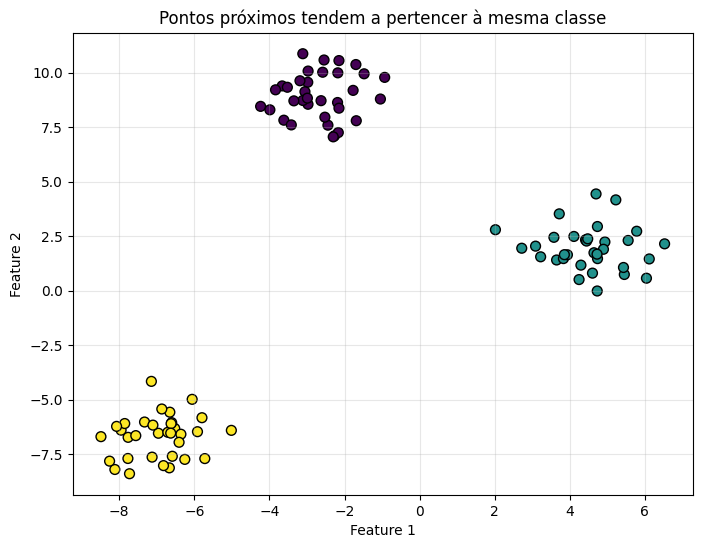

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Gerar dados sintéticos com 3 clusters
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title('Pontos próximos tendem a pertencer à mesma classe')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

## Premissa 2: Métrica de Distância Adequada

**Princípio:** A escolha da métrica de distância afeta diretamente a definição de "proximidade".

Principais métricas:
- **Euclidiana:** $d = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$ - Distância em linha reta
- **Manhattan:** $d = \sum_{i=1}^{n}|x_i - y_i|$ - Distância por caminhos ortogonais
- **Minkowski:** Generalização das anteriores

Ponto A: [1 1]
Ponto B: [4 5]

Distância Euclidiana: 5.00
Distância Manhattan: 7.00


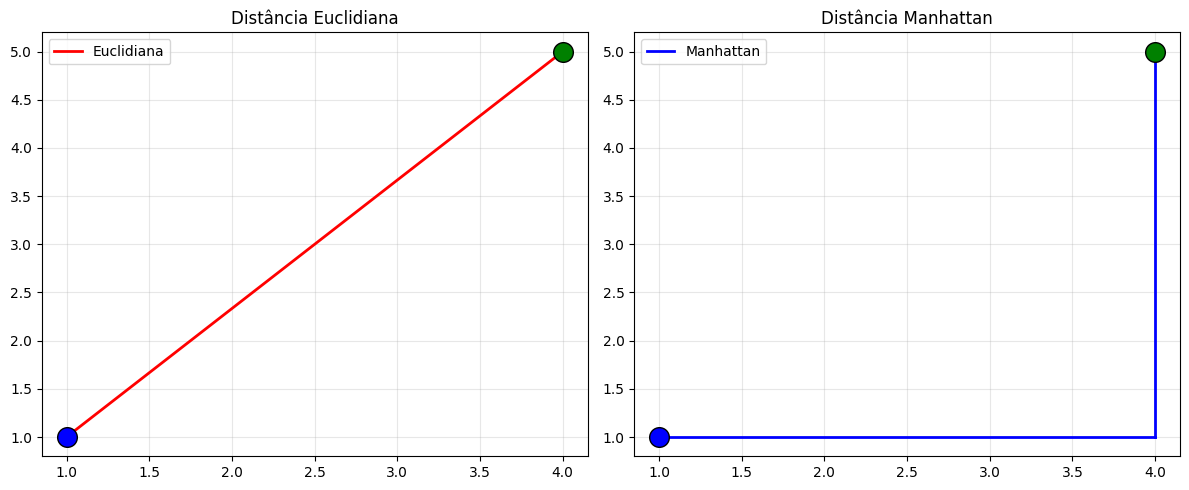

In [17]:
# Comparação de métricas de distância
ponto_A = np.array([1, 1])
ponto_B = np.array([4, 5])

# Distância Euclidiana
dist_euclidiana = np.sqrt(np.sum((ponto_A - ponto_B)**2))

# Distância Manhattan
dist_manhattan = np.sum(np.abs(ponto_A - ponto_B))

print(f"Ponto A: {ponto_A}")
print(f"Ponto B: {ponto_B}")
print(f"\nDistância Euclidiana: {dist_euclidiana:.2f}")
print(f"Distância Manhattan: {dist_manhattan:.2f}")

# Visualizar as diferenças
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Euclidiana
ax[0].plot([ponto_A[0], ponto_B[0]], [ponto_A[1], ponto_B[1]], 'r-', linewidth=2, label='Euclidiana')
ax[0].scatter(*ponto_A, s=200, c='blue', edgecolor='k', zorder=3)
ax[0].scatter(*ponto_B, s=200, c='green', edgecolor='k', zorder=3)
ax[0].set_title('Distância Euclidiana')
ax[0].grid(True, alpha=0.3)
ax[0].legend()

# Manhattan
ax[1].plot([ponto_A[0], ponto_B[0]], [ponto_A[1], ponto_A[1]], 'b-', linewidth=2)
ax[1].plot([ponto_B[0], ponto_B[0]], [ponto_A[1], ponto_B[1]], 'b-', linewidth=2, label='Manhattan')
ax[1].scatter(*ponto_A, s=200, c='blue', edgecolor='k', zorder=3)
ax[1].scatter(*ponto_B, s=200, c='green', edgecolor='k', zorder=3)
ax[1].set_title('Distância Manhattan')
ax[1].grid(True, alpha=0.3)
ax[1].legend()

plt.tight_layout()
plt.show()

## Premissa 3: Normalização das Features

**Princípio:** Features em escalas diferentes podem dominar o cálculo de distância.

**Problema:** Uma feature com valores entre 0-1000 terá peso muito maior que uma feature entre 0-1.

**Solução:** Normalizar ou padronizar os dados antes de aplicar o KNN.

In [18]:
from sklearn.preprocessing import StandardScaler

# Dados com escalas diferentes
idade = np.array([25, 30, 35]).reshape(-1, 1)
salario = np.array([30000, 45000, 60000]).reshape(-1, 1)

# Combinar features
dados = np.hstack([idade, salario])

# Novo ponto para avaliar
ponto_novo = np.array([[28, 35000]])

# SEM normalização
dist_sem_norm = np.sqrt(np.sum((dados - ponto_novo)**2, axis=1))

# COM normalização
scaler = StandardScaler()
dados_norm = scaler.fit_transform(dados)
ponto_novo_norm = scaler.transform(ponto_novo)
dist_com_norm = np.sqrt(np.sum((dados_norm - ponto_novo_norm)**2, axis=1))

print("Dados originais:")
print("Idade | Salário")
for i in range(len(dados)):
    print(f"{dados[i, 0]:5.0f} | {dados[i, 1]:7.0f}")
print(f"\nPonto novo: [{ponto_novo[0, 0]:.0f}, {ponto_novo[0, 1]:.0f}]")

print("\n--- SEM Normalização ---")
print(f"Distâncias: {dist_sem_norm}")
print(f"Vizinho mais próximo: índice {np.argmin(dist_sem_norm)}")

print("\n--- COM Normalização ---")
print(f"Distâncias: {dist_com_norm}")
print(f"Vizinho mais próximo: índice {np.argmin(dist_com_norm)}")

print("\nNota: A diferença de escala faz o salário dominar o cálculo sem normalização.")

Dados originais:
Idade | Salário
   25 |   30000
   30 |   45000
   35 |   60000

Ponto novo: [28, 35000]

--- SEM Normalização ---
Distâncias: [ 5000.0009  10000.0002  25000.00098]
Vizinho mais próximo: índice 0

--- COM Normalização ---
Distâncias: [0.84063468 0.95219046 2.6658332 ]
Vizinho mais próximo: índice 0

Nota: A diferença de escala faz o salário dominar o cálculo sem normalização.


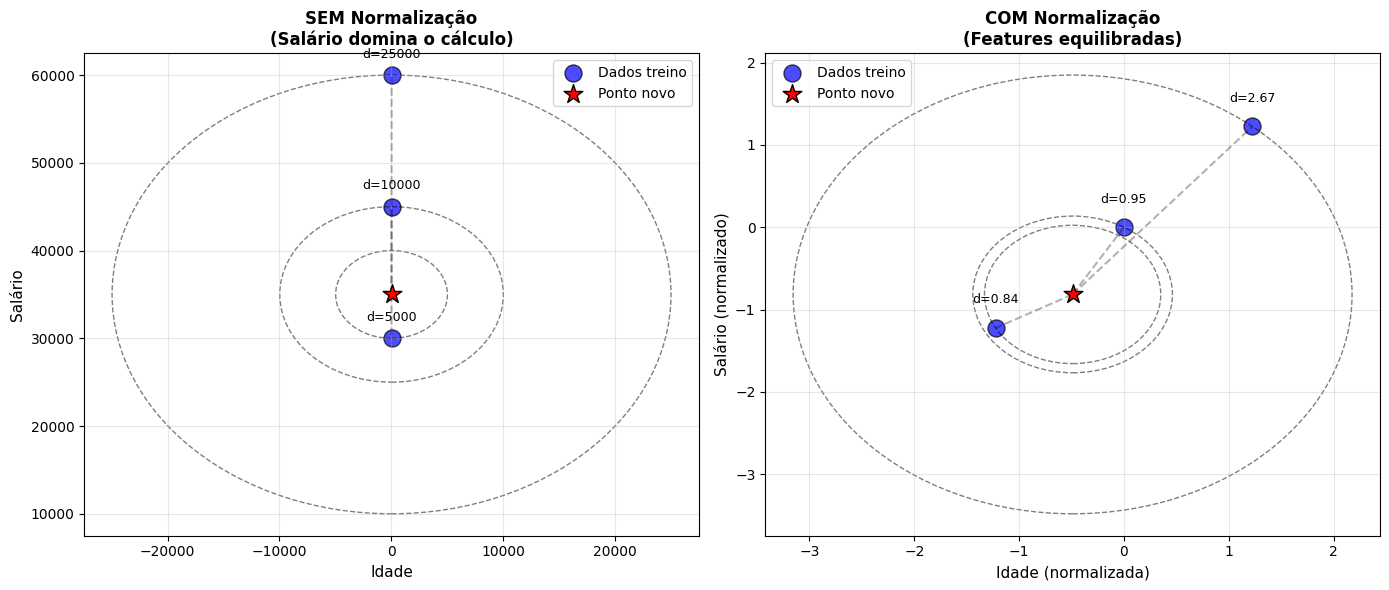


Observação:
- À esquerda: diferença enorme de escala faz o salário dominar completamente
- À direita: após normalização, ambas as features contribuem igualmente para a distância


In [19]:
# Visualizar o impacto da normalização
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Dados SEM normalização
ax1 = axes[0]
ax1.scatter(dados[:, 0], dados[:, 1], s=150, c='blue', edgecolor='k', label='Dados treino', alpha=0.7)
ax1.scatter(ponto_novo[0, 0], ponto_novo[0, 1], s=200, c='red', marker='*', edgecolor='k', label='Ponto novo', zorder=5)

# Desenhar círculos de distância sem normalização
for i, dist in enumerate(dist_sem_norm):
    circle = plt.Circle((ponto_novo[0, 0], ponto_novo[0, 1]), dist, fill=False, linestyle='--', alpha=0.5)
    ax1.add_patch(circle)
    ax1.plot([ponto_novo[0, 0], dados[i, 0]], [ponto_novo[0, 1], dados[i, 1]], 'k--', alpha=0.3)
    ax1.text(dados[i, 0], dados[i, 1] + 2000, f'd={dist:.0f}', fontsize=9, ha='center')

ax1.set_xlabel('Idade', fontsize=11)
ax1.set_ylabel('Salário', fontsize=11)
ax1.set_title('SEM Normalização\n(Salário domina o cálculo)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Dados COM normalização
ax2 = axes[1]
ax2.scatter(dados_norm[:, 0], dados_norm[:, 1], s=150, c='blue', edgecolor='k', label='Dados treino', alpha=0.7)
ax2.scatter(ponto_novo_norm[0, 0], ponto_novo_norm[0, 1], s=200, c='red', marker='*', edgecolor='k', label='Ponto novo', zorder=5)

# Desenhar círculos de distância com normalização
for i, dist in enumerate(dist_com_norm):
    circle = plt.Circle((ponto_novo_norm[0, 0], ponto_novo_norm[0, 1]), dist, fill=False, linestyle='--', alpha=0.5)
    ax2.add_patch(circle)
    ax2.plot([ponto_novo_norm[0, 0], dados_norm[i, 0]], [ponto_novo_norm[0, 1], dados_norm[i, 1]], 'k--', alpha=0.3)
    ax2.text(dados_norm[i, 0], dados_norm[i, 1] + 0.3, f'd={dist:.2f}', fontsize=9, ha='center')

ax2.set_xlabel('Idade (normalizada)', fontsize=11)
ax2.set_ylabel('Salário (normalizado)', fontsize=11)
ax2.set_title('COM Normalização\n(Features equilibradas)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservação:")
print("- À esquerda: diferença enorme de escala faz o salário dominar completamente")
print("- À direita: após normalização, ambas as features contribuem igualmente para a distância")

## Premissa 4: Escolha Adequada do K

**Princípio:** O valor de K afeta diretamente o viés e a variância do modelo.

- **K pequeno (ex: K=1):** Modelo mais complexo, sensível a ruídos (alta variância)
- **K grande:** Modelo mais simples, pode perder padrões locais (alto viés)
- **Regra prática:** K costuma ser ímpar para evitar empates em classificação binária

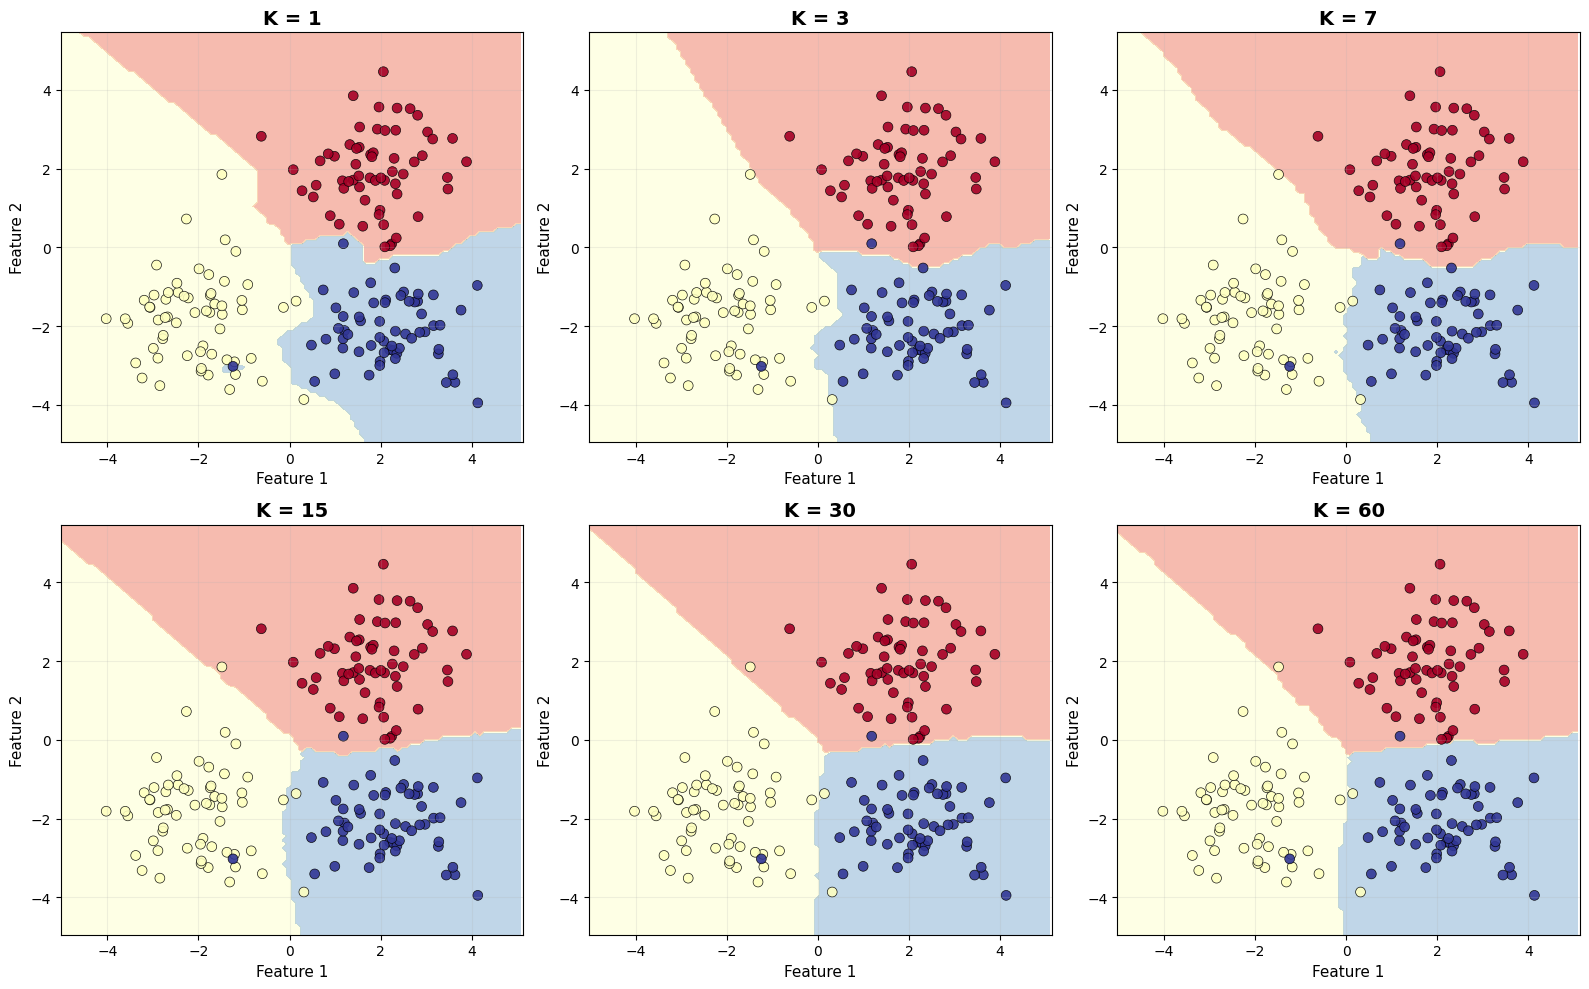

Análise das fronteiras:
- K=1: Fronteira extremamente irregular com 'ilhas' (sobreajuste)
- K=3 a K=7: Fronteira razoavelmente suave, captura padrões reais
- K=15: Fronteira mais suave, começa a perder detalhes
- K=30 e K=60: Fronteira muito simplificada (subajuste)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Gerar dados com sobreposição para que diferenças em K sejam mais visíveis
np.random.seed(42)
X1 = np.random.randn(60, 2) + np.array([2, 2])
X2 = np.random.randn(60, 2) + np.array([-2, -2])
X3 = np.random.randn(60, 2) + np.array([2, -2])
X = np.vstack([X1, X2, X3])
y = np.hstack([np.zeros(60), np.ones(60), np.full(60, 2)])

# Visualizar fronteiras de decisão para diferentes valores de K
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
valores_k = [1, 3, 7, 15, 30, 60]

for idx, k in enumerate(valores_k):
    ax = axes[idx // 3, idx % 3]
    
    # Treinar modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Criar mesh para visualizar fronteira de decisão
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotar fronteira com cores mais definidas
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu', levels=2)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=50, edgecolor='black', linewidth=0.5, alpha=0.9)
    ax.set_title(f'K = {k}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    ax.grid(True, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

print("Análise das fronteiras:")
print("- K=1: Fronteira extremamente irregular com 'ilhas' (sobreajuste)")
print("- K=3 a K=7: Fronteira razoavelmente suave, captura padrões reais")
print("- K=15: Fronteira mais suave, começa a perder detalhes")
print("- K=30 e K=60: Fronteira muito simplificada (subajuste)")

### Como identificar o melhor K?

Use **validação cruzada** para testar diferentes valores de K e escolher aquele com melhor desempenho.

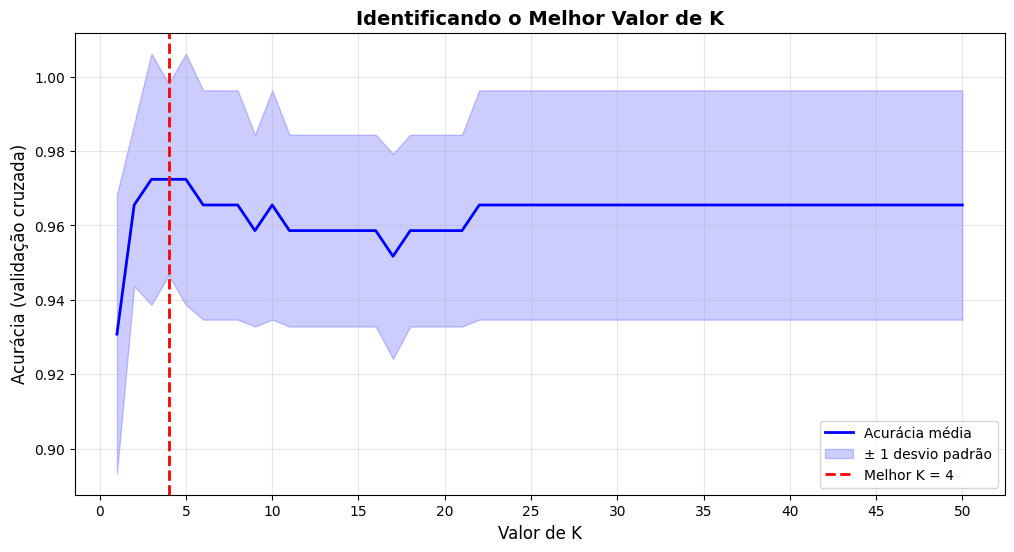

Melhor K: 4
Acurácia média (validação cruzada): 0.972

Dica: Prefira valores ímpares para evitar empates em classificação binária


In [21]:
from sklearn.model_selection import cross_val_score

# Separar dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testar valores de K de 1 a 50
k_range = range(1, 51)
scores_mean = []
scores_std = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Validação cruzada com 5 folds
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores_mean.append(scores.mean())
    scores_std.append(scores.std())

# Encontrar o melhor K
melhor_k = k_range[np.argmax(scores_mean)]
melhor_score = max(scores_mean)

# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(k_range, scores_mean, 'b-', linewidth=2, label='Acurácia média')
plt.fill_between(k_range, 
                 np.array(scores_mean) - np.array(scores_std),
                 np.array(scores_mean) + np.array(scores_std),
                 alpha=0.2, color='blue', label='± 1 desvio padrão')
plt.axvline(x=melhor_k, color='red', linestyle='--', linewidth=2, label=f'Melhor K = {melhor_k}')
plt.xlabel('Valor de K', fontsize=12)
plt.ylabel('Acurácia (validação cruzada)', fontsize=12)
plt.title('Identificando o Melhor Valor de K', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 51, 5))
plt.show()

print(f"Melhor K: {melhor_k}")
print(f"Acurácia média (validação cruzada): {melhor_score:.3f}")
print(f"\nDica: Prefira valores ímpares para evitar empates em classificação binária")

## Premissa 5: Dados Balanceados

**Princípio:** Classes desbalanceadas podem enviesar as previsões.

Se uma classe tem muito mais exemplos que outra, o KNN tende a favorecer a classe majoritária, pois a votação dos K vizinhos será dominada pela classe com mais representantes.

### Técnicas de balanceamento para KNN:

**1. SMOTE (Synthetic Minority Over-sampling Technique)** ✅ Recomendado
- Cria dados sintéticos da classe minoritária
- Aumenta o tamanho do dataset de treino
- Adequado para desbalanceamento moderado a severo

**2. Random Oversampling** ✅
- Duplica exemplos da classe minoritária
- Mais simples que SMOTE, mas pode causar overfitting

**3. Random Undersampling** ✅
- Remove exemplos da classe majoritária
- Use quando a classe majoritária tem muitos dados

**4. weights='distance'** ⚠️
- Dá mais peso aos vizinhos mais próximos
- **NÃO balanceia classes**, mas melhora a precisão

**⚠️ Importante:** KNN **NÃO possui** o parâmetro `class_weight` (diferente de Regressão Logística). Para balancear, use técnicas de reamostragem como SMOTE.

In [23]:
from sklearn.datasets import make_classification
from collections import Counter

# Criar dataset desbalanceado (90% classe 0, 10% classe 1)
X_desb, y_desb = make_classification(n_samples=200, n_features=2, n_informative=2, 
                                      n_redundant=0, n_clusters_per_class=1,
                                      weights=[0.9, 0.1], random_state=42)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_desb, y_desb, test_size=0.3, random_state=42)

print("Distribuição das classes no treino:")
print(Counter(y_train_d))

# KNN sem ponderação
knn_normal = KNeighborsClassifier(n_neighbors=5)
knn_normal.fit(X_train_d, y_train_d)
y_pred_normal = knn_normal.predict(X_test_d)

# KNN com ponderação por distância
knn_ponderado = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_ponderado.fit(X_train_d, y_train_d)
y_pred_ponderado = knn_ponderado.predict(X_test_d)

print("\n--- Resultados ---")
print(f"Acurácia KNN normal: {accuracy_score(y_test_d, y_pred_normal):.3f}")
print(f"Acurácia KNN ponderado: {accuracy_score(y_test_d, y_pred_ponderado):.3f}")

print("\nPrevisões KNN normal:")
print(Counter(y_pred_normal))
print("\nPrevisões KNN ponderado:")
print(Counter(y_pred_ponderado))

Distribuição das classes no treino:
Counter({np.int64(0): 126, np.int64(1): 14})

--- Resultados ---
Acurácia KNN normal: 1.000
Acurácia KNN ponderado: 0.983

Previsões KNN normal:
Counter({np.int64(0): 54, np.int64(1): 6})

Previsões KNN ponderado:
Counter({np.int64(0): 53, np.int64(1): 7})


## Resumo das Premissas

| Premissa | Descrição | Ação |
|----------|-----------|------|
| **Similaridade** | Pontos próximos pertencem à mesma classe | Garantir features relevantes |
| **Métrica de distância** | Define o conceito de proximidade | Escolher métrica adequada ao problema |
| **Normalização** | Features em escalas diferentes distorcem distâncias | Sempre normalizar/padronizar |
| **Valor de K** | Define viés vs variância | Testar diferentes valores (validação cruzada) |
| **Balanceamento** | Classes desbalanceadas enviesam predições | Ponderar ou rebalancear dados |

**Quando usar KNN:**
- Dados com fronteiras de decisão não-lineares
- Datasets pequenos a médios
- Quando interpretabilidade local é importante

**Quando evitar KNN:**
- Datasets muito grandes (custo computacional alto)
- Muitas dimensões (curse of dimensionality)
- Dados com muito ruído

---

## O que são "Dados com Muito Ruído"?

**Ruído** são valores imprecisos, inconsistentes ou irrelevantes que não representam os padrões reais do problema.

### Tipos de ruído:

**1. Ruído nos valores (noise in features)**
- Erros de medição ou digitação
- Falhas de sensores
- Valores impossíveis ou inconsistentes

**Exemplo:**
```
Dados limpos:  idade = [25, 30, 35, 40]
Dados ruidosos: idade = [25, 30, 999, 40]  ← erro de digitação
```

**2. Ruído nos labels (target incorreto)**
- Classes/targets rotuladas incorretamente
- Erros humanos na rotulação

**Exemplo:**
```
Email: "Ganhe 1 milhão agora!" → Rotulado como "Não-spam" ❌ (ERRO)
```

**3. Outliers (valores extremos)**
- Valores muito distantes do padrão geral
- Podem ser válidos ou erros

**Exemplo:**
```
Salários: [3000, 4500, 6000, 1000000] ← CEO no dataset de júnior
```

**4. Sobreposição natural (overlapping)**
- Classes que se misturam naturalmente
- Não há fronteira clara

---

### Por que KNN é sensível a ruído?

KNN toma decisões baseadas **diretamente** nos vizinhos mais próximos:

1. **Sem robustez:** KNN NÃO ignora pontos suspeitos
2. **Outliers influenciam demais:** Um único ponto ruidoso pode mudar classificações de toda uma região
3. **K=1 é pior:** Um único vizinho ruidoso determina a classe
4. **Não aprende padrões globais:** Apenas memoriza os dados (instance-based)

**Exemplo prático:**

```
Cenário: Classificar clientes que compram (●) ou não (○)

Dados limpos:
● Clientes que compram: renda > 5000
○ Clientes que não compram: renda < 3000

Dados com ruído:
● Cliente rico (renda = 10000) marcado ERRADO como ○ 
→ KNN classificará toda vizinhança dele incorretamente!
```

---

### Como identificar dados ruidosos:

- ✅ Performance muito diferente entre treino e teste (overfitting)
- ✅ Pontos isolados muito distantes dos clusters
- ✅ Valores impossíveis (idade negativa, salário = 0)
- ✅ Fronteiras de decisão excessivamente irregulares com K pequeno
- ✅ Inconsistências óbvias nos dados

---

### Como lidar com ruído no KNN:

| Técnica | Descrição |
|---------|-----------|
| **Aumentar K** | Mais vizinhos diluem o efeito de outliers |
| **Limpeza de dados** | Remover/corrigir valores inconsistentes |
| **Remover outliers** | Usar IQR, Z-score para detectar |
| **Usar modelos robustos** | Random Forest, SVM são menos sensíveis |
| **weights='distance'** | Dá menos peso a vizinhos distantes |
| **Validação cruzada** | Detectar overfitting causado por ruído |

**Conclusão:** Dados ruidosos prejudicam muito o KNN. Sempre faça limpeza e análise exploratória antes de aplicar o modelo.